In [23]:
import requests
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick
import matplotlib as mpl
import matplotlib.font_manager as font_manager
import plotly.graph_objects as go
import plotly.offline as pyo
from pathlib import Path

#Request for the json file of the defenders' data -> obtained on postman and adapting the url to increase the limit and get all players data
#Also we filtered only the midfields with over 20 matches and normalized the stats by 90 minutes played to each player in order to compare properly
#We had to split the requests in 2 parts because the limit of the API is 100 per request

url = "https://api.sofascore.com/api/v1/unique-tournament/325/season/27591/statistics?limit=100&order=-rating&accumulation=per90&fields=saves%2CsavedShotsFromInsideTheBox%2CsavedShotsFromOutsideTheBox%2CsuccessfulRunsOut%2Cpunches%2ChighClaims&filters=appearances.GT.20%2Cposition.in.G"

payload={}
headers = {
  'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:83.0) Gecko/20100101 Firefox/83.0',
  'Accept': '*/*',
  'Accept-Language': 'pt-BR,pt;q=0.8,en-US;q=0.5,en;q=0.3',
  'Referer': 'https://www.sofascore.com/tournament/football/brazil/brasileiro-serie-a/325',
  'Origin': 'https://www.sofascore.com',
  'Connection': 'keep-alive',
  'TE': 'Trailers',
  'Cookie': '__cfduid=d9abe87eb214a7e6080a15fbdbd7055c01619186545'
}

r1 = requests.get(url, headers = headers)
gk_data = r1.json()
df_gk = pd.json_normalize(gk_data['results'])
print(df_gk.columns)

Index(['saves', 'savedShotsFromInsideTheBox', 'savedShotsFromOutsideTheBox',
       'successfulRunsOut', 'punches', 'highClaims', 'player.name',
       'player.slug', 'player.userCount', 'player.id', 'team.name',
       'team.slug', 'team.shortName', 'team.userCount', 'team.type', 'team.id',
       'team.teamColors.primary', 'team.teamColors.secondary',
       'team.teamColors.text'],
      dtype='object')


In [24]:
cols =  ['player.slug', 'player.userCount', 'team.slug', 'team.shortName', 'team.userCount', 'team.type', 'team.id',
       'team.teamColors.primary', 'team.teamColors.secondary',
       'team.teamColors.text','player.id']
df_gk.drop(columns=cols, inplace=True)

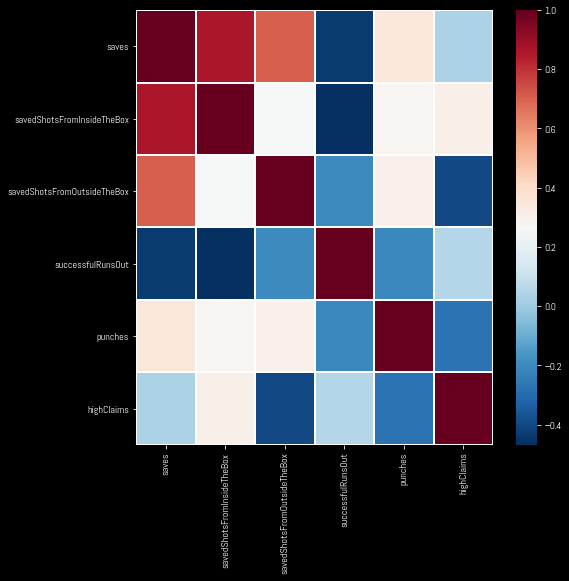

In [25]:
corr_matrix = df_gk.corr()
fig,ax = plt.subplots(figsize=(8,8))
sns.heatmap(corr_matrix, linewidths=.3, cmap = 'RdBu_r')
fig.savefig('corrmatrixgk.png')

In [26]:
#Adding the fonts to system's fonts
font_dir  = ['/Users/bcpython/Documents/Python Projects/Brasileirao Stats Analysis/fonts']
for font in font_manager.findSystemFonts(font_dir):
    font_manager.fontManager.addfont(font)

In [27]:
df_gk = df_gk.rename(columns = {'player.name':'player', 'team.name':'team' })
df_gk

,saves,savedShotsFromInsideTheBox,savedShotsFromOutsideTheBox,successfulRunsOut,punches,highClaims,player,team
0,4.06,1.97,2.10,0.13,0.74,0.16,Luan Polli,Sport Recife
1,3.00,1.73,1.21,0.24,0.58,0.27,Santos,Athletico Paranaense
2,2.90,1.60,1.23,0.20,0.33,0.43,Weverton,Palmeiras
3,3.88,2.56,1.31,0.16,0.72,0.44,Tadeu,Goiás
4,2.83,1.89,0.94,0.14,0.56,0.53,Jean,Atlético Goianiense
5,3.29,2.06,1.21,0.06,0.53,0.38,Wilson,Coritiba
6,3.37,1.94,1.37,0.03,0.43,0.43,Cássio,Corinthians
7,2.78,1.49,1.27,0.19,0.46,0.32,Felipe Alves,Fortaleza
8,3.45,2.05,1.41,0.00,0.82,0.32,Fernando Prass,Ceará SC
9,3.47,2.19,1.28,0.08,0.53,0.44,Fernando Miguel,Vasco da Gama


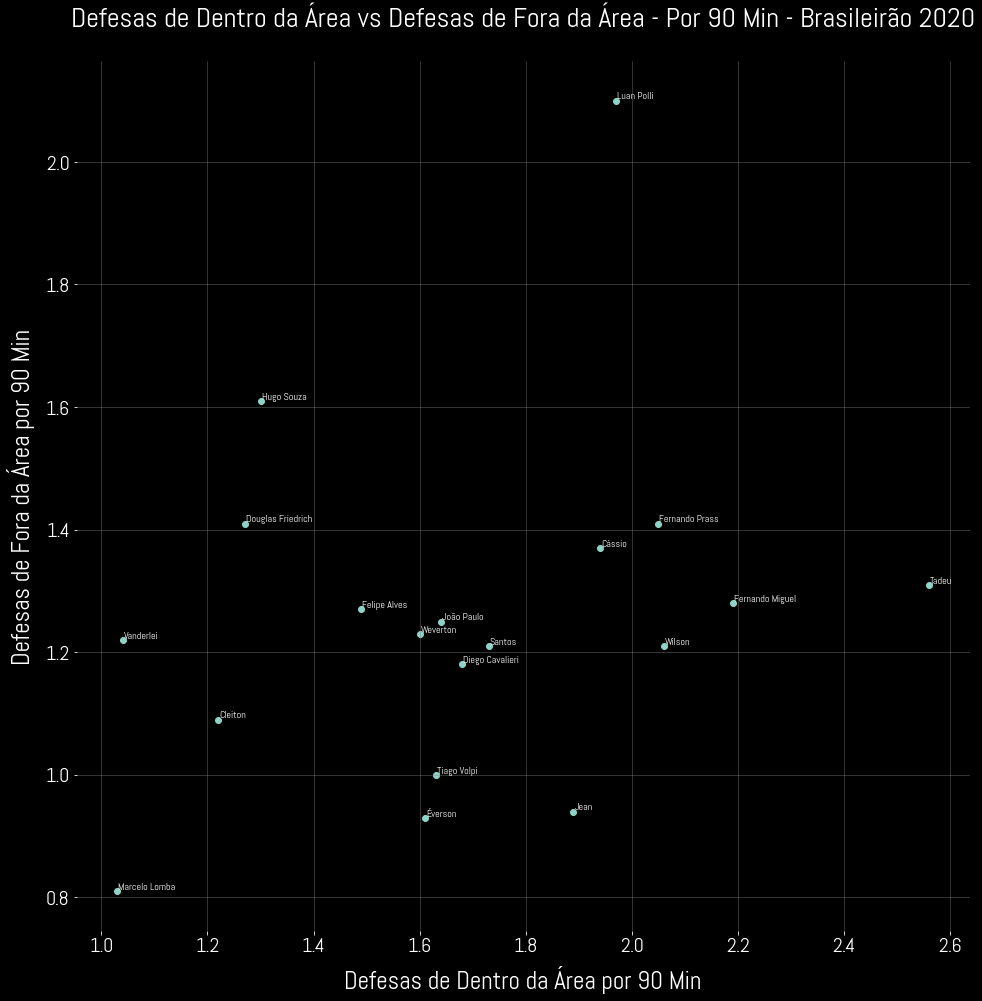

In [28]:
#Defining style and properties
plt.style.use('dark_background')
plt.rc('font', family='Abel')
fig,ax = plt.subplots(figsize=(16,16))
fpath = Path(mpl.get_data_path(), "fonts/ttf/Merriweather-Regular.ttf")

#Defining the scatter
plt.scatter(df_gk['savedShotsFromInsideTheBox'],df_gk['savedShotsFromOutsideTheBox'])

#Annotation on the scatter points
for i in range (df_gk.shape[0]):
    plt.text(x=df_gk.savedShotsFromInsideTheBox[i] + 0.002,
             y=df_gk.savedShotsFromOutsideTheBox[i] + 0.003,
             s = df_gk.player[i])
    
#Grid and axis properties
plt.grid(alpha = 0.5, color = 'gray')
sns.despine(left = True, bottom = True)
ax.xaxis.set_tick_params(labelsize=20)
ax.yaxis.set_tick_params(labelsize=20)
#ax.xaxis.set_major_formatter(mtick.PercentFormatter(decimals = 0))
#ax.yaxis.set_major_formatter(mtick.PercentFormatter(decimals = 0))

#Texts
plt.title(f'Defesas de Dentro da Área vs Defesas de Fora da Área - Por 90 Min - Brasileirão 2020',
          fontsize = 28, pad = 35)
plt.xlabel(xlabel='Defesas de Dentro da Área por 90 Min', fontsize = 25, labelpad = 10)
plt.ylabel(ylabel='Defesas de Fora da Área por 90 Min', fontsize = 25, labelpad = 10)

#Showing the plot
plt.show()

#Saving
fig.savefig('DefesasnaAreavsDefesasFora.png')

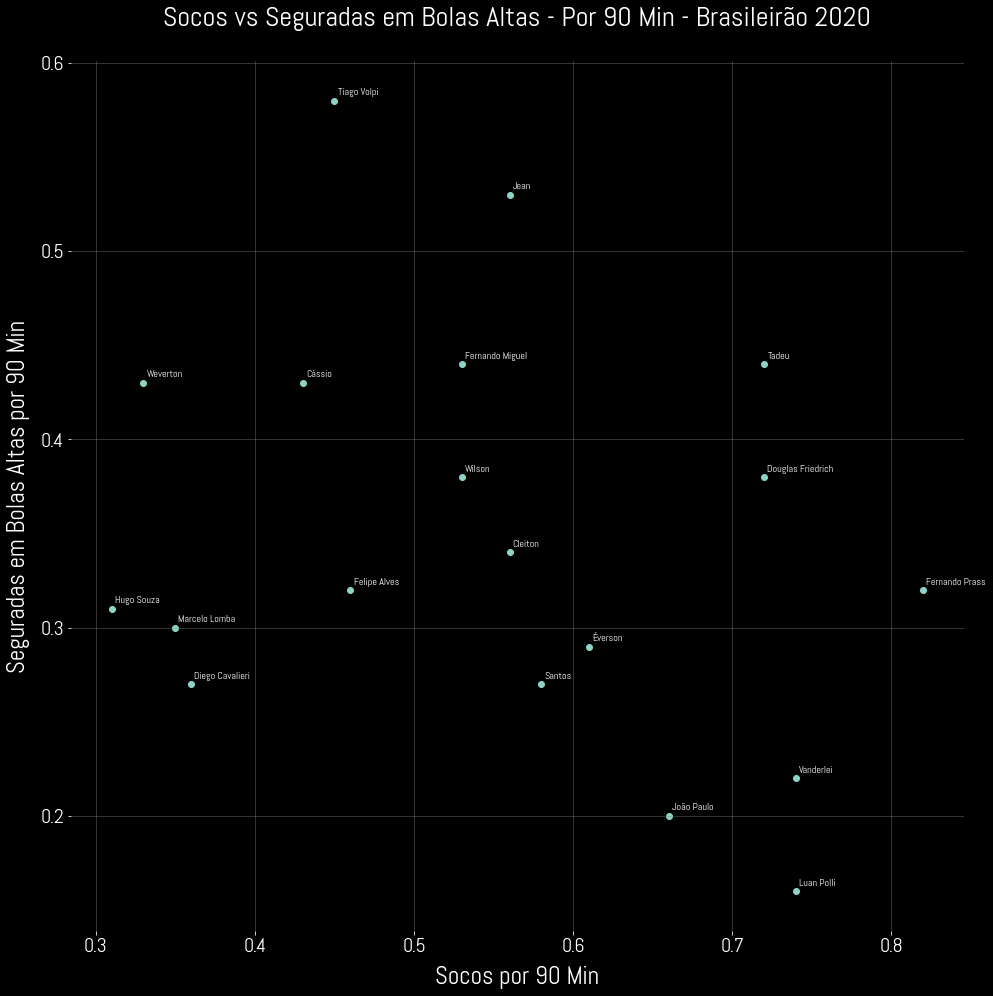

In [29]:
#Defining style and properties
plt.style.use('dark_background')
plt.rc('font', family='Abel')
fig,ax = plt.subplots(figsize=(16,16))
fpath = Path(mpl.get_data_path(), "fonts/ttf/Merriweather-Regular.ttf")

#Defining the scatter
plt.scatter(df_gk['punches'],df_gk['highClaims'])

#Annotation on the scatter points
for i in range (df_gk.shape[0]):
    plt.text(x=df_gk.punches[i] + 0.002,
             y=df_gk.highClaims[i] + 0.003,
             s = df_gk.player[i])
    
#Grid and axis properties
plt.grid(alpha = 0.5, color = 'gray')
sns.despine(left = True, bottom = True)
ax.xaxis.set_tick_params(labelsize=20)
ax.yaxis.set_tick_params(labelsize=20)
#ax.xaxis.set_major_formatter(mtick.PercentFormatter(decimals = 0))
#ax.yaxis.set_major_formatter(mtick.PercentFormatter(decimals = 0))

#Texts
plt.title(f'Socos vs Seguradas em Bolas Altas - Por 90 Min - Brasileirão 2020',
          fontsize = 28, pad = 35)
plt.xlabel(xlabel='Socos por 90 Min', fontsize = 25, labelpad = 10)
plt.ylabel(ylabel='Seguradas em Bolas Altas por 90 Min', fontsize = 25, labelpad = 10)

#Showing the plot
plt.show()

#Saving
fig.savefig('SocosvsSeguradas.png')

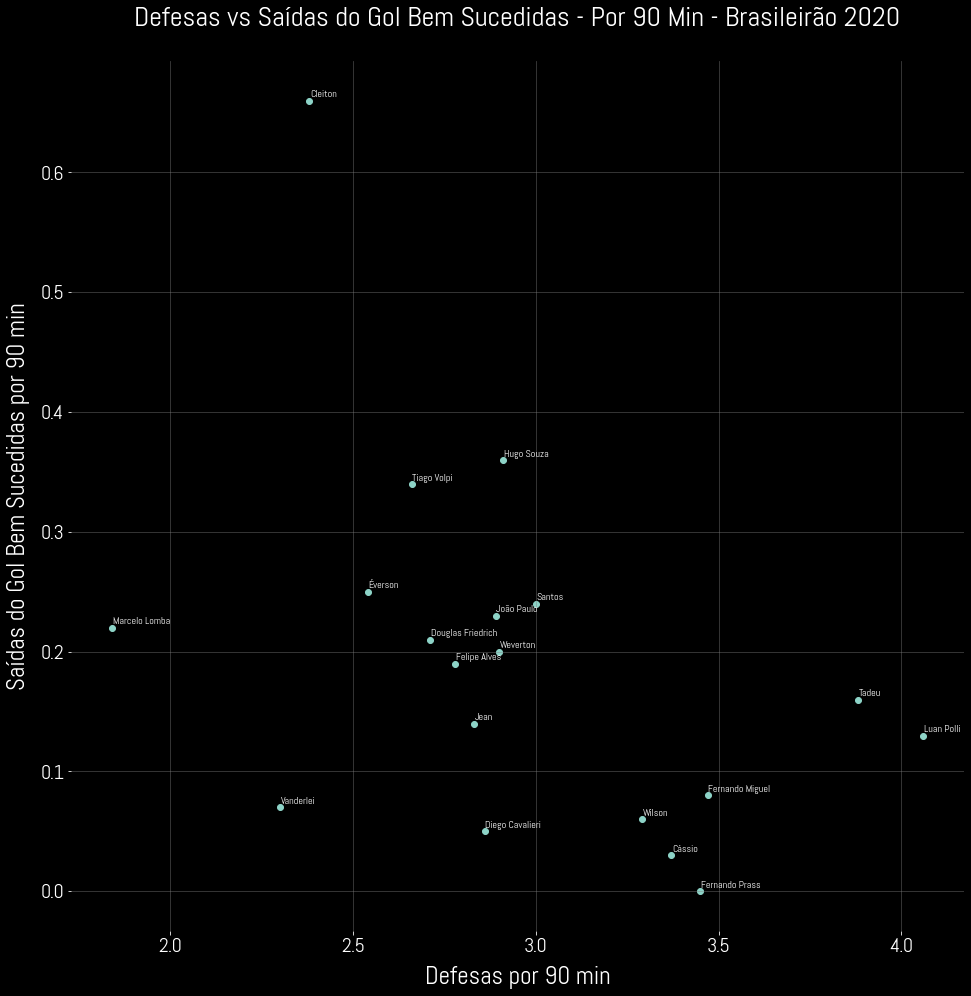

In [30]:
#Defining style and properties
plt.style.use('dark_background')
plt.rc('font', family='Abel')
fig,ax = plt.subplots(figsize=(16,16))
fpath = Path(mpl.get_data_path(), "fonts/ttf/Merriweather-Regular.ttf")

#Defining the scatter
plt.scatter(df_gk['saves'],df_gk['successfulRunsOut'])

#Annotation on the scatter points
for i in range (df_gk.shape[0]):
    plt.text(x=df_gk.saves[i] + 0.002,
             y=df_gk.successfulRunsOut[i] + 0.003,
             s = df_gk.player[i])
    
#Grid and axis properties
plt.grid(alpha = 0.5, color = 'gray')
sns.despine(left = True, bottom = True)
ax.xaxis.set_tick_params(labelsize=20)
ax.yaxis.set_tick_params(labelsize=20)
#ax.xaxis.set_major_formatter(mtick.PercentFormatter(decimals = 0))
#ax.yaxis.set_major_formatter(mtick.PercentFormatter(decimals = 0))

#Texts
plt.title(f'Defesas vs Saídas do Gol Bem Sucedidas - Por 90 Min - Brasileirão 2020',
          fontsize = 28, pad = 35)
plt.xlabel(xlabel='Defesas por 90 min', fontsize = 25, labelpad = 10)
plt.ylabel(ylabel='Saídas do Gol Bem Sucedidas por 90 min', fontsize = 25, labelpad = 10)

#Showing the plot
plt.show()

#Saving
fig.savefig('DefesasvsSaidasBemSucedidas.png')

In [31]:
labelsgk1 = ['player','punches', 'highClaims', 'saves','savedShotsFromInsideTheBox','savedShotsFromOutsideTheBox']
df_gk1 = df_gk[(df_gk['player'] == 'Weverton')
                                | (df_gk['player'] == 'Cássio')
                                | (df_gk['player'] == 'Tadeu')].reset_index(drop=True)
df_gk_vw1 = df_gk1[labelsgk1]
df_gk_vw1

,player,punches,highClaims,saves,savedShotsFromInsideTheBox,savedShotsFromOutsideTheBox
0,Weverton,0.33,0.43,2.90,1.60,1.23
1,Tadeu,0.72,0.44,3.88,2.56,1.31
2,Cássio,0.43,0.43,3.37,1.94,1.37


In [33]:
categories = labelsgk1[1:]
categories = [*categories, categories[0]]

players = df_gk_vw1.values.tolist()

player_1 = players[0][1:]
player_1 = [*player_1, player_1[0]]
player_2 = players[1][1:]
player_2 = [*player_2, player_2[0]]
player_3 = players[2][1:]
player_3 = [*player_3, player_3[0]]

fig = go.Figure(
    data = [ go.Scatterpolar(r=player_1, theta = categories, name = players[0][0]),
             go.Scatterpolar(r=player_2, theta = categories, name = players[1][0]),
             go.Scatterpolar(r=player_3, theta = categories, name = players[2][0])],
    layout = go.Layout(
    autosize = False,
    width = 700,
    height = 500,
    title=go.layout.Title(text = 'Comparação Goleiros'),
    polar = {'radialaxis':{'visible':True}},
    showlegend = True)
)

pyo.iplot(fig)